## Transition probabilities
- T describes: $\hat{x} = T x$
- we average over all experiments

In [1]:
## Load
%load_ext autoreload
%autoreload 2
from evaluation_scripts.experiment_class import Experiment
from evaluation_scripts.transition_probabilities_class import Transition_probabilities
import pandas as pd
from itertools import product

## Do
- Get the x phenotypes.
    - S + U = S, A + A = A, A+B = A&B etc.
    - Equations can be found in the SI of the paper
- The loaded data correspond to $\hat{x}(t)$
- This data will be transformed to $x(t+1)$
- Than we can find a T that describes $\hat{x}(t+1) = Tx(t)$, since $\hat{x}(t+1)$ is known
- fishies will remain fishy exept they are mixed with ABr

In [56]:
class Plate:
    def __init__(self, df, transfer, p):
        self.data = data = df[(df.transfer_n == t) & (df.plate == p)]
        self.transfer = transfer
        self.plate = p
        self.control_wells = data[data.comment == "Control Well"]
        self.assay_wells = data[data.exclude != True]
        if len(self.assay_wells) > 0:
            self.plate_excluded = False
            self.number_control_contaminations = sum(self.control_wells.phenotype != "U")
            self.number_infected_wells = sum(self.assay_wells.phenotype != "U")
            self.contains_double_resistance = "AB_r" in self.control_wells.phenotype
        else:
            self.plate_excluded = True
        

In [60]:
experiments = ["20220412", "20220127", "20210417"]

exp_plates = {}
for i, exp in enumerate(experiments):
    print("\n ", exp)
    
    experiment = Experiment(exp, exclude = False)
    df = experiment.data
    plates = []
    for p,t in product(df.plate.unique(), df.transfer_n.unique()):
        plates.append(Plate(df, t, p))
    exp_plates.update({i:plates})


  20220412

  20220127

  20210417


In [58]:
marker = {0 : ".", 1:"x", 2:"*"}
color = {True : "red", False:"blue"}

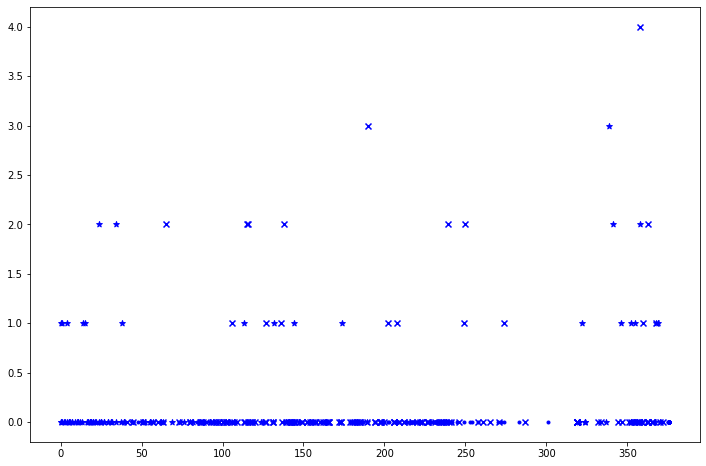

In [71]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))

for i, plates in exp_plates.items():
    m = marker[i]
    for plate in plates:
        if plate.plate_excluded == False:
            ax.scatter(plate.number_infected_wells, plate.number_control_contaminations, color = color[plate.contains_double_resistance], marker = m)

In [44]:
plate.number_infected_wells

24